# Computer Vision Book

## LeNet implementation with Keras and MNIST dataset

---

In this notebook, we train a Convolutional Neural Network to classify images from the MNIST database.

### 1. Load MNIST Database

MNIST is one of the most famous datasets in the field of machine learning. 
 - It has 70,000 images of hand-written digits
 - Very straight forward to download
 - Images dimensions are 28x28
 - Grayscale images

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

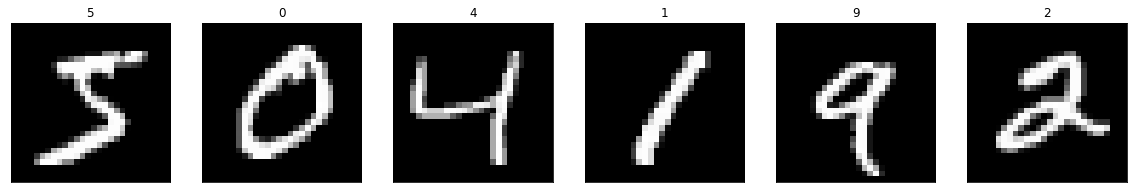

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

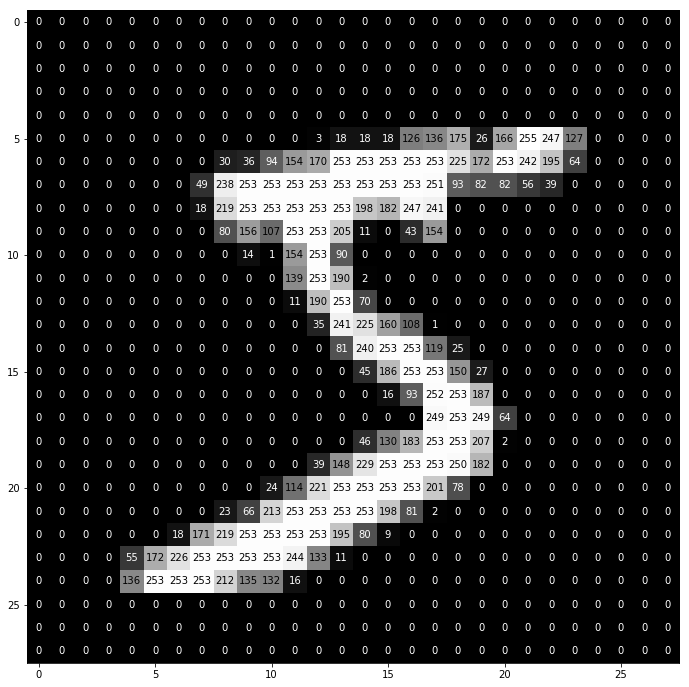

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Preprocess input images: Rescale the Images by Dividing Every Pixel in Every Image by 255

In [2]:
# rescale to have values within 0 - 1 range [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### 5. Preprocess the labels: Encode Categorical Integer Labels Using a One-Hot Scheme

In [3]:
from keras.utils import np_utils

num_classes = 10 
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### 6. Reshape data to fit our CNN (and input_shape)

In [4]:
# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

input_shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


### 7. Define the Model Architecture

You must pass the following arguments:
- filters - The number of filters.
- kernel_size - Number specifying both the height and width of the (square) convolution window.

There are some additional, optional arguments that you might like to tune:

- strides - The stride of the convolution. If you don't specify anything, strides is set to 1.
- padding - One of 'valid' or 'same'. If you don't specify anything, padding is set to 'valid'.
- activation - Typically 'relu'. If you don't specify anything, no activation is applied. You are strongly encouraged to add a ReLU activation function to every convolutional layer in your networks.

** Things to remember ** 
- Always add a ReLU activation function to the **Conv2D** layers in your CNN. With the exception of the final layer in the network, Dense layers should also have a ReLU activation function.
- When constructing a network for classification, the final layer in the network should be a **Dense** layer with a softmax activation function. The number of nodes in the final layer should equal the total number of classes in the dataset.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D

#Instantiate an empty model
model5 = Sequential()

# C1 Convolutional Layer
model5.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding='same'))

# S2 Pooling Layer
model5.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model5.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# S4 Pooling Layer
model5.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
model5.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
#Flatten the CNN output so that we can connect it with fully connected layers
model5.add(Flatten())

# FC6 Fully Connected Layer
model5.add(Dense(84, activation='tanh'))

#Output Layer with softmax activation
model5.add(Dense(10, activation='softmax'))



In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 84)                10164     
__________

### 8. Compile the Model

In [17]:
# rmsprop and Adaptive learning rate (adaDelta) are popular form of gradient descent rivaled only by adam and adagrad 
# categorical ce since we have multiple classes (10) 

# compile the model
model5.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 9. Train the Model

In [18]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model5.fit(X_train, y_train, batch_size=32, epochs=12,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
Epoch 00000: val_loss improved from inf to 0.14243, saving model to model.weights.best.hdf5
115s - loss: 0.2461 - acc: 0.9267 - val_loss: 0.1424 - val_acc: 0.9559
Epoch 2/12
Epoch 00001: val_loss improved from 0.14243 to 0.09258, saving model to model.weights.best.hdf5
111s - loss: 0.1213 - acc: 0.9643 - val_loss: 0.0926 - val_acc: 0.9714
Epoch 3/12
Epoch 00002: val_loss improved from 0.09258 to 0.06893, saving model to model.weights.best.hdf5
111s - loss: 0.0839 - acc: 0.9745 - val_loss: 0.0689 - val_acc: 0.9774
Epoch 4/12
Epoch 00003: val_loss improved from 0.06893 to 0.06264, saving model to model.weights.best.hdf5
109s - loss: 0.0682 - acc: 0.9788 - val_loss: 0.0626 - val_acc: 0.9801
Epoch 5/12
Epoch 00004: val_loss improved from 0.06264 to 0.05505, saving model to model.weights.best.hdf5
111s - loss: 0.0587 - acc: 0.9827 - val_loss: 0.0551 - val_acc: 0.9816
Epoch 6/12
Epoch 00005: val_loss improved from 0.05505 to 0.0503

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [20]:
# load the weights that yielded the best validation accuracy
model5.load_weights('model.weights.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [22]:
# evaluate test accuracy
score = model5.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.7300%


## 12. evaluate the model

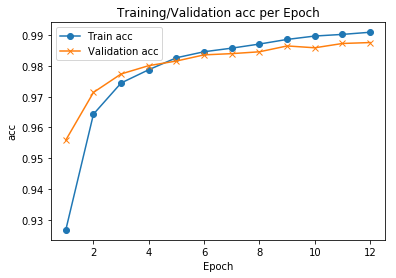

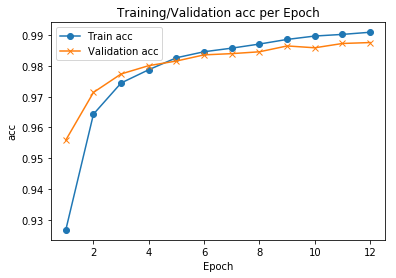

In [25]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['acc'], 'o-')
ax.plot([None] + hist.history['val_acc'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()

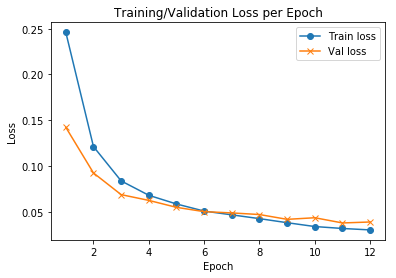

In [26]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

### Imp note:

MLPs and CNNs do not usually yeild comparable results. The MNIST dataset is very special because it is very clean and perfectly preprocessed. For example, all images have the same size and are centered in a 28x28 pixel grid. It would be a much harder task if the digits were skewed a little or not centered. In the case or real-world messy image data, CNNs will truly SHINE over MLPs. 

For some intuition for why this might be the case, in order to feed an image to an MLP, you must first convert the image to a vector. The MLP then treats the image as a simple vector of numbers with no special structure. It has no knowledge of the fact that these numbers are originally spatially arranged in a grid.

CNNs in contrast, were built for the exact same purpose of working with the patterns in multidimensional data. Unlike MLPs, CNNs understand the fact that image pixels that are closer to each other are heavily related than pixels that are far apart from each other.